In [483]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [484]:
class unknown_dist:
    def __init__(self, type, degree = 1):
        self.type = type
        match self.type:
            case 'polynomial':
                self.degree = degree
                self.coefs = 2 * np.random.rand(self.degree + 1, 1) - 1
            case 'sigmoid':
                self.degree = degree
                self.coefs = 0
            case 'sin':
                self.degree = degree
                self.coefs = 0
            
    def sample(self, x):
        match self.type:
            case 'polynomial':
                x_ = np.power(x, np.arange(self.degree + 1))
                return np.dot(x_, self.coefs)
            case 'sigmoid':
                return 1/(1+np.exp(-x))
            case 'sin':
                return np.sin(x)
    
    @staticmethod
    def noise(x):
        return 0.1 * np.random.normal(0, 1, size=np.shape(x))

(500, 1)
0


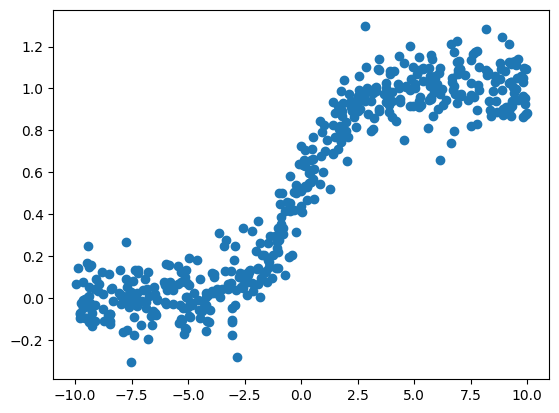

In [485]:
# d = unknown_dist('polynomial', degree=5)
d = unknown_dist('sin', 20)
n = 500

bound = 10
x = np.random.uniform(-bound, bound, n).reshape(n, 1)
y = d.sample(x)+ d.noise(x)

print(np.shape(x))
plt.scatter(x, y)

print(d.coefs)

(500, 21)
Coefficients: 
 [[ 0.00000000e+00 -1.22668289e-07 -1.04588160e-09  1.77540572e-09
  -2.82671962e-08  2.21047869e-08 -3.69010840e-07  2.46131776e-07
  -2.85027418e-06  1.54810179e-06  2.56418894e-07 -1.03037575e-07
  -9.29365364e-09  2.72598757e-09  1.74602523e-10 -3.57819974e-11
  -1.79965419e-12  2.32723761e-13  9.67899595e-15 -5.99694051e-16
  -2.12786852e-17]] [0.52275029]
Mean squared error: 0.06
Coefficient of determination: 0.69


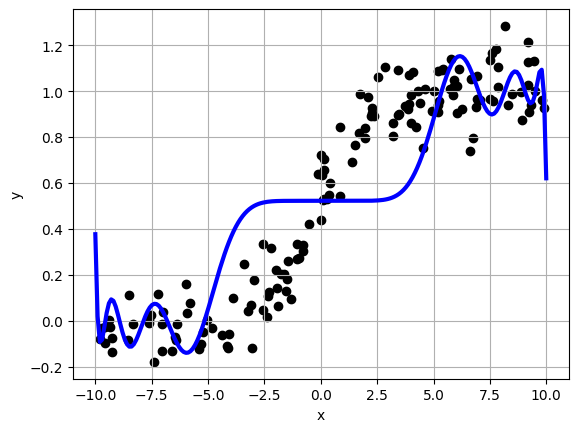

In [486]:
x = np.power(x, np.arange(d.degree + 1))
print(np.shape(x))

split = int(0.3 * n)

x_train = x[:-split]
x_test = x[-split:]

y_train = y[:-split]
y_test = y[-split:]

regr = linear_model.LinearRegression().fit(x_train, y_train)
y_pred = regr.predict(x_test)

# The coefficients
print("Coefficients: \n", regr.coef_, regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
n_f = 200

funcspace = np.linspace(-bound, bound, n_f).reshape(n_f, 1)
funcspace = np.power(funcspace, np.arange(d.degree + 1))

plt.scatter(x_test[:, 1], y_test, color="black")
plt.plot(funcspace[:,1], regr.predict(funcspace), color="blue", linewidth=3)

plt.xlabel("x")
plt.ylabel("y")

plt.grid()
plt.show()

Coefficients: 
 [[ 0.00000000e+00  2.25075811e-01 -1.27743968e-02 -1.65274698e-02
   2.89959579e-03  1.88985701e-03 -1.98550265e-04 -1.49783171e-04
   4.77305780e-06  6.79872017e-06  3.44388092e-08 -1.81511164e-07
  -4.13918474e-09  2.91698645e-09  9.05684251e-11 -2.77718559e-11
  -9.53410281e-13  1.44319054e-13  5.03781683e-15 -3.15402036e-16
  -1.07224029e-17]] [0.50735769]
Mean squared error: 0.06


c:\Users\bluej\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.82862e-42): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


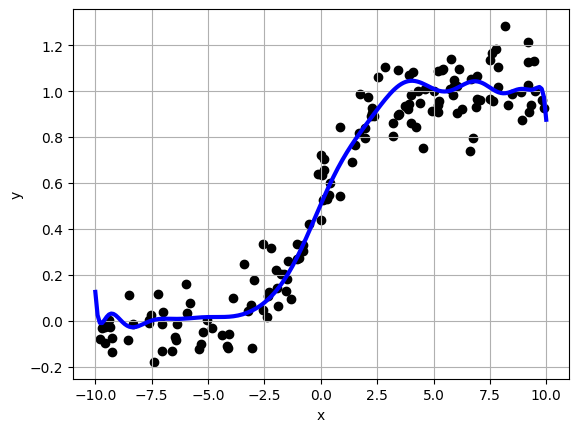

In [487]:
# add ridge regression
clf = linear_model.Ridge(alpha=1.0).fit(x_train, y_train)
y_pred_ridge = clf.predict(x_test)

# The coefficients
print("Coefficients: \n", clf.coef_, clf.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

plt.scatter(x_test[:, 1], y_test, color="black")
plt.plot(funcspace[:,1], clf.predict(funcspace), color="blue", linewidth=3)

plt.xlabel("x")
plt.ylabel("y")

plt.grid()
plt.show()